### Plot convergence graphs for all inversions

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import matplotlib.colors as mcolors

# Change these inputs  
parameter_file = 'Parameter_List_Adjoint_tutorial_Set_4.csv'
in_filename = 'output_adjoint_NK.csv'

out_filename = 'final_'+ in_filename

# We open the source file and get its lines
with open(in_filename, 'r') as inp:
    lines = inp.readlines()

# We open the target file in write-mode
with open(out_filename, 'w') as out:
    # We go line by line writing in the target file
    # if the original line does not include the
    # strings 'py-board' or 'coffee'
    for line in lines:
        if not 'SNES' in line and not 'Linear' in line and not 'Lin-More' in line and not 'Optimization' in line and not 'iter' in line and not 'Processed' in line and not 'Terminal' in line and not '<class' in line and not 'Method' in line and not 'Line' in line:
            if line:
                out.write(line)

# Find iteration limits from parameter file
iteration_limits = []
initial_radius = []
radius_growing_rate = []
radius_shrinking_rate_negative_rho= []
radius_shrinking_rate_positive_rho= []
radius_shrinking_threshold = []
radius_growing_threshold = []
with open(parameter_file) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        if row[0]:
            if line_count == 0:
                line_count += 1
            else:
                iteration_limits.append(int(row[1]))
                initial_radius.append(float(row[2]))
                radius_growing_rate.append(float(row[3]))
                radius_shrinking_rate_negative_rho.append(float(row[4]))
                radius_shrinking_rate_positive_rho.append(float(row[5]))
                radius_shrinking_threshold.append(float(row[6]))
                radius_growing_threshold.append(float(row[7]))

# Get fvals and grads
fval = []
grad = []
with open(out_filename) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        if any(field.strip() for field in row):
            line_count= line_count+1
            column=0
            for t in row[0].split():
                try:
                    column = column + 1
                    if column == 7:
                        grad.append(float(t))
                    elif column == 6:
                        fval.append(float(t))
                except ValueError:
                    pass
fval_plus_grad = [sum(n) for n in zip(*[fval, grad])]
# print(f'gradients: {grad} \n fvals: {fval} \n fval+grad: {fval_plus_grad}')     

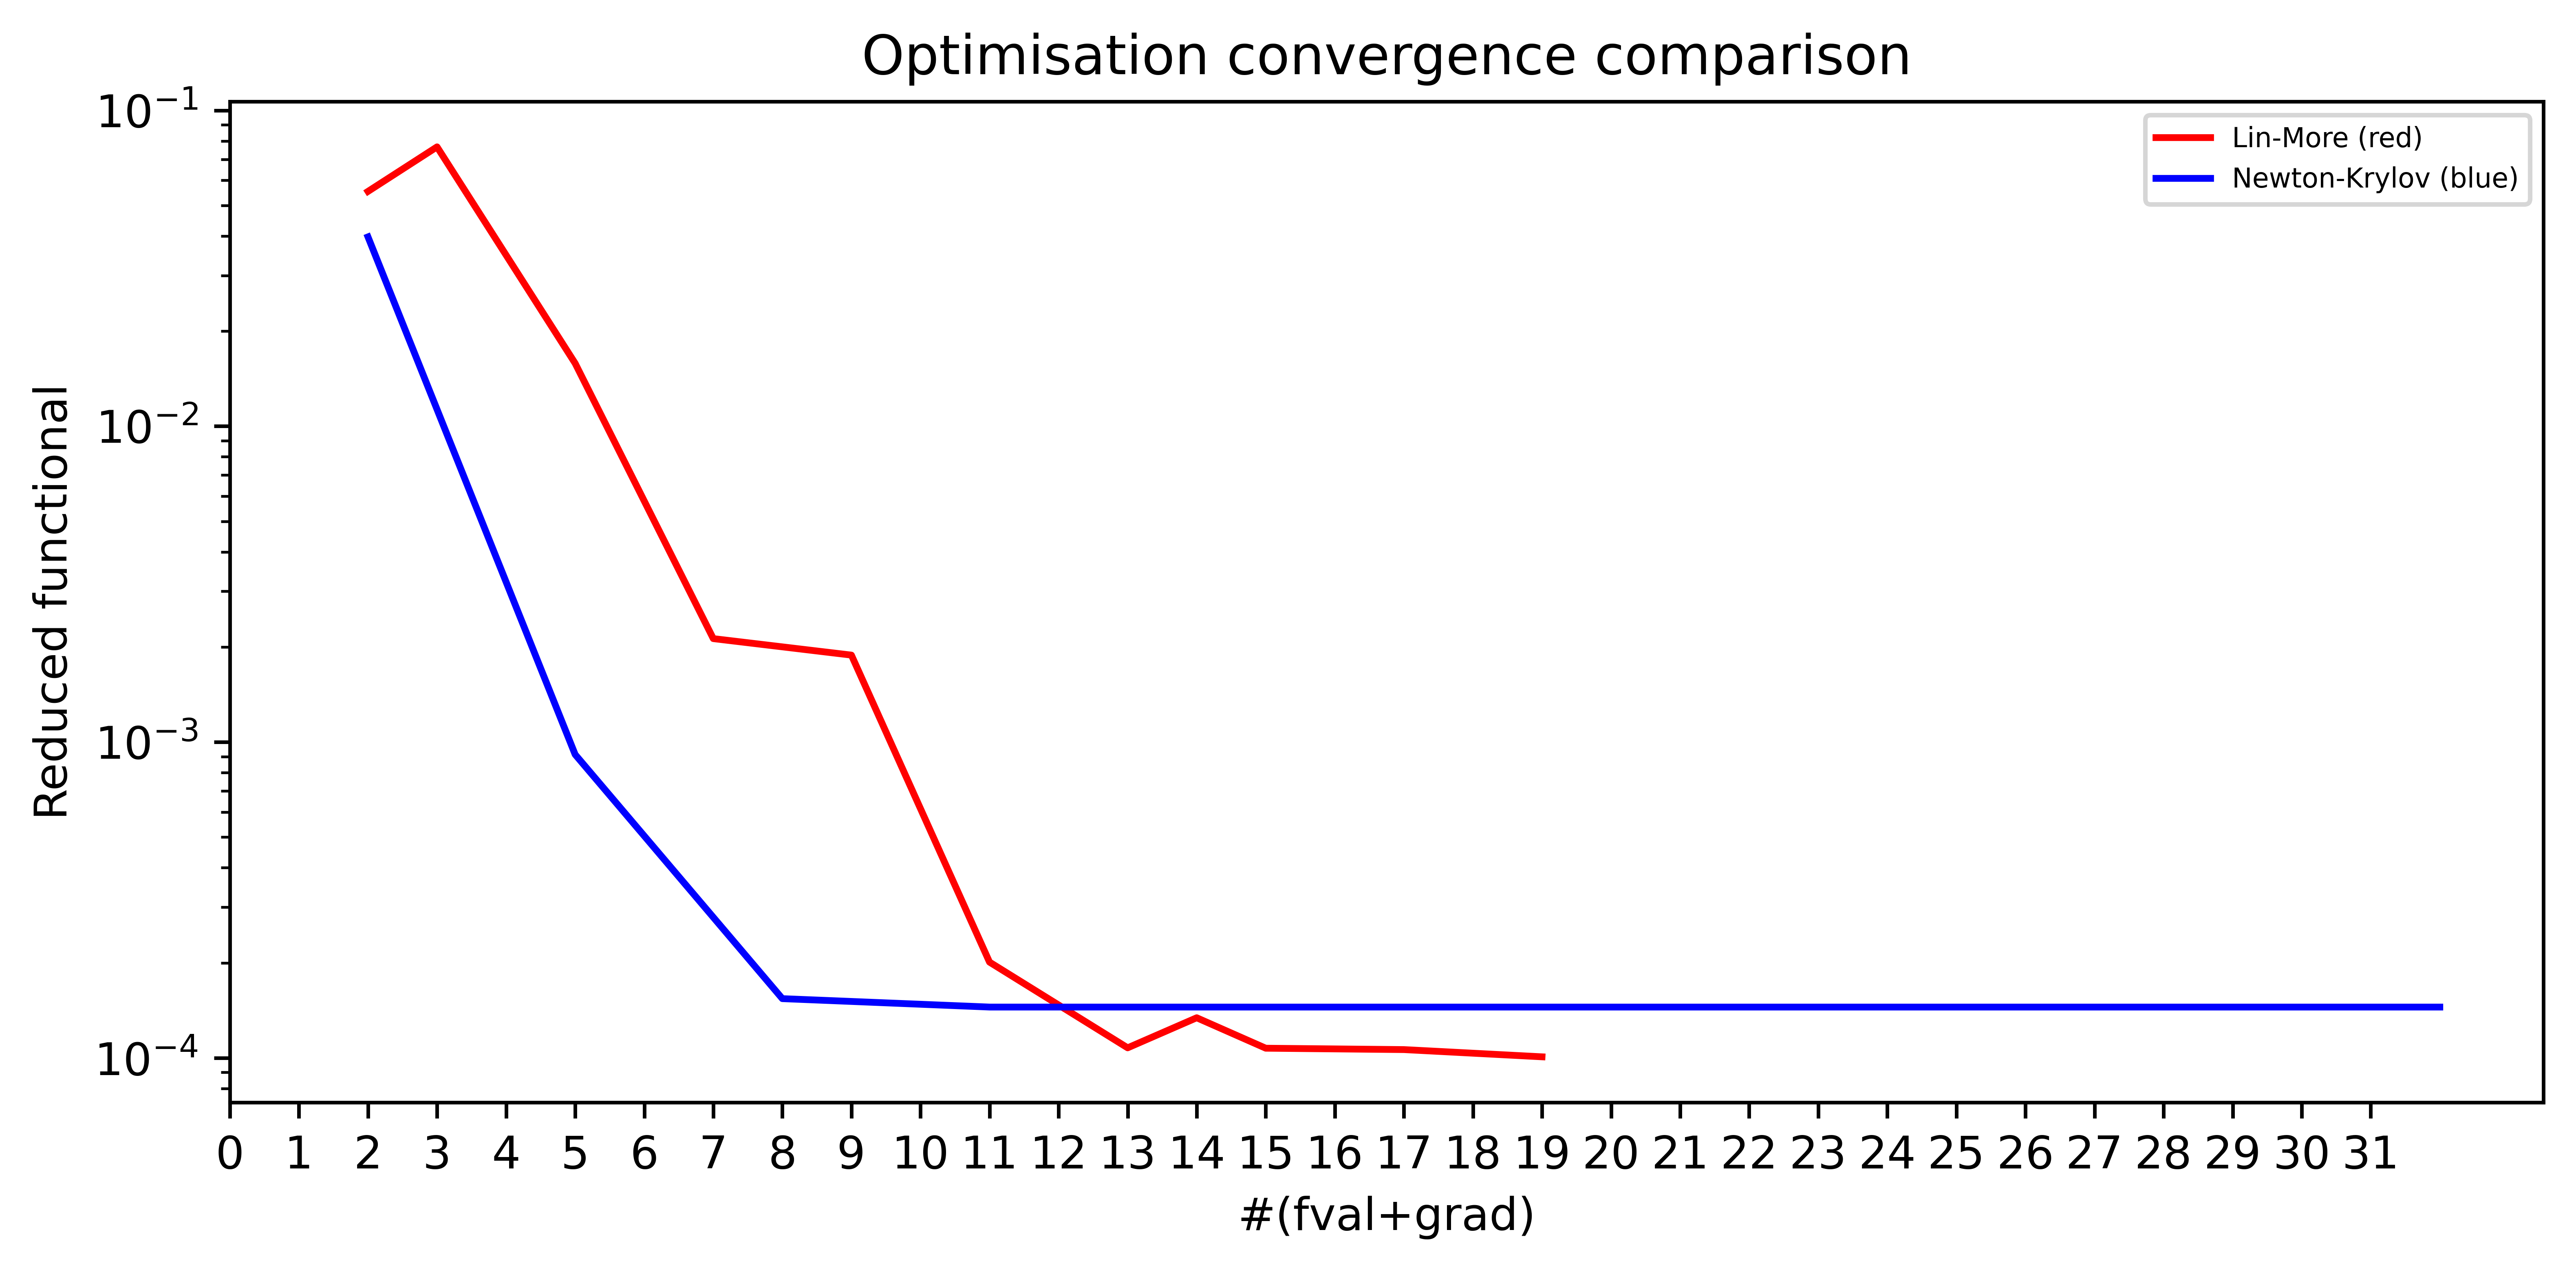

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import matplotlib.colors as mcolors

# Lin More reading start--------------------------------------------------------------------------------------------------------------------------------

# Change these inputs
in_filename = 'output_adjoint.csv'
filename = 'functional.txt'

out_filename = 'final_'+ in_filename

# We open the source file and get its lines
with open(in_filename, 'r') as inp:
    lines = inp.readlines()

# We open the target file in write-mode
with open(out_filename, 'w') as out:
    # We go line by line writing in the target file
    # if the original line does not include the
    # strings 'py-board' or 'coffee'
    for line in lines:
        if not 'SNES' in line and not 'Linear' in line and not 'Lin-More' in line and not 'Optimization' in line and not 'iter' in line and not 'Processed' in line and not 'Terminal' in line and not '<class' in line and not 'Method' in line and not 'Line' in line:
            if line:
                out.write(line)

# Get fvals and grads
fval = []
grad = []
with open(out_filename) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        if any(field.strip() for field in row):
            line_count= line_count+1
            column=0
            for t in row[0].split():
                try:
                    column = column + 1
                    if column == 7:
                        grad.append(float(t))
                    elif column == 6:
                        fval.append(float(t))
                except ValueError:
                    pass
fval_plus_grad = [sum(n) for n in zip(*[fval, grad])]
max1 = fval_plus_grad[-1]
list=[] # Create an empty list for storing the functional values
# Open the file in read mode
with open(filename, 'r') as file: 
    # Read lines from the file 
    lines = file.readlines() 
    # Convert the lines to numbers 
    numbers = [float(line.strip()) for line in lines] 
    list.append(numbers)

plt.figure(figsize=(8,4), dpi=800)
plt.plot(fval_plus_grad, list[0], label='Lin-More (red)', color = 'r')

# Lin More reading end----------------------------------------------------------------------------------------------------------------------------------

# Newton Krylov reading start---------------------------------------------------------------------------------------------------------------------------


# Change these inputs
in_filename = 'output_adjoint_NK.csv'
filename = 'functional_NK.txt'

out_filename = 'final_'+ in_filename

# We open the source file and get its lines
with open(in_filename, 'r') as inp:
    lines = inp.readlines()

# We open the target file in write-mode
with open(out_filename, 'w') as out:
    # We go line by line writing in the target file
    # if the original line does not include the
    # strings 'py-board' or 'coffee'
    for line in lines:
        if not 'SNES' in line and not 'Linear' in line and not 'Lin-More' in line and not 'Optimization' in line and not 'iter' in line and not 'Processed' in line and not 'Terminal' in line and not '<class' in line and not 'Method' in line and not 'Line' in line:
            if line:
                out.write(line)

# Get fvals and grads
fval = []
grad = []
with open(out_filename) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        if any(field.strip() for field in row):
            line_count= line_count+1
            column=0
            for t in row[0].split():
                try:
                    column = column + 1
                    if column == 7:
                        grad.append(float(t))
                    elif column == 6:
                        fval.append(float(t))
                except ValueError:
                    pass
fval_plus_grad = [sum(n) for n in zip(*[fval, grad])]
max2 = fval_plus_grad[-1]
list=[] # Create an empty list for storing the functional values
# Open the file in read mode
with open(filename, 'r') as file: 
    # Read lines from the file 
    lines = file.readlines() 
    # Convert the lines to numbers 
    numbers = [float(line.strip()) for line in lines] 
    list.append(numbers)

plt.plot(fval_plus_grad, list[0], label='Newton-Krylov (blue)', color = 'b')
if max1 > max2:
    max = max1
else:
    max = max2
plt.xlabel("#(fval+grad)")
plt.ylabel("Reduced functional")
plt.yscale("log")
plt.xticks(range(0,int(max)))
plt.legend(loc=1, prop={'size': 6})
plt.title('Optimisation convergence comparison')
plt.tight_layout()

In [16]:
print(type(a))

<class 'list'>


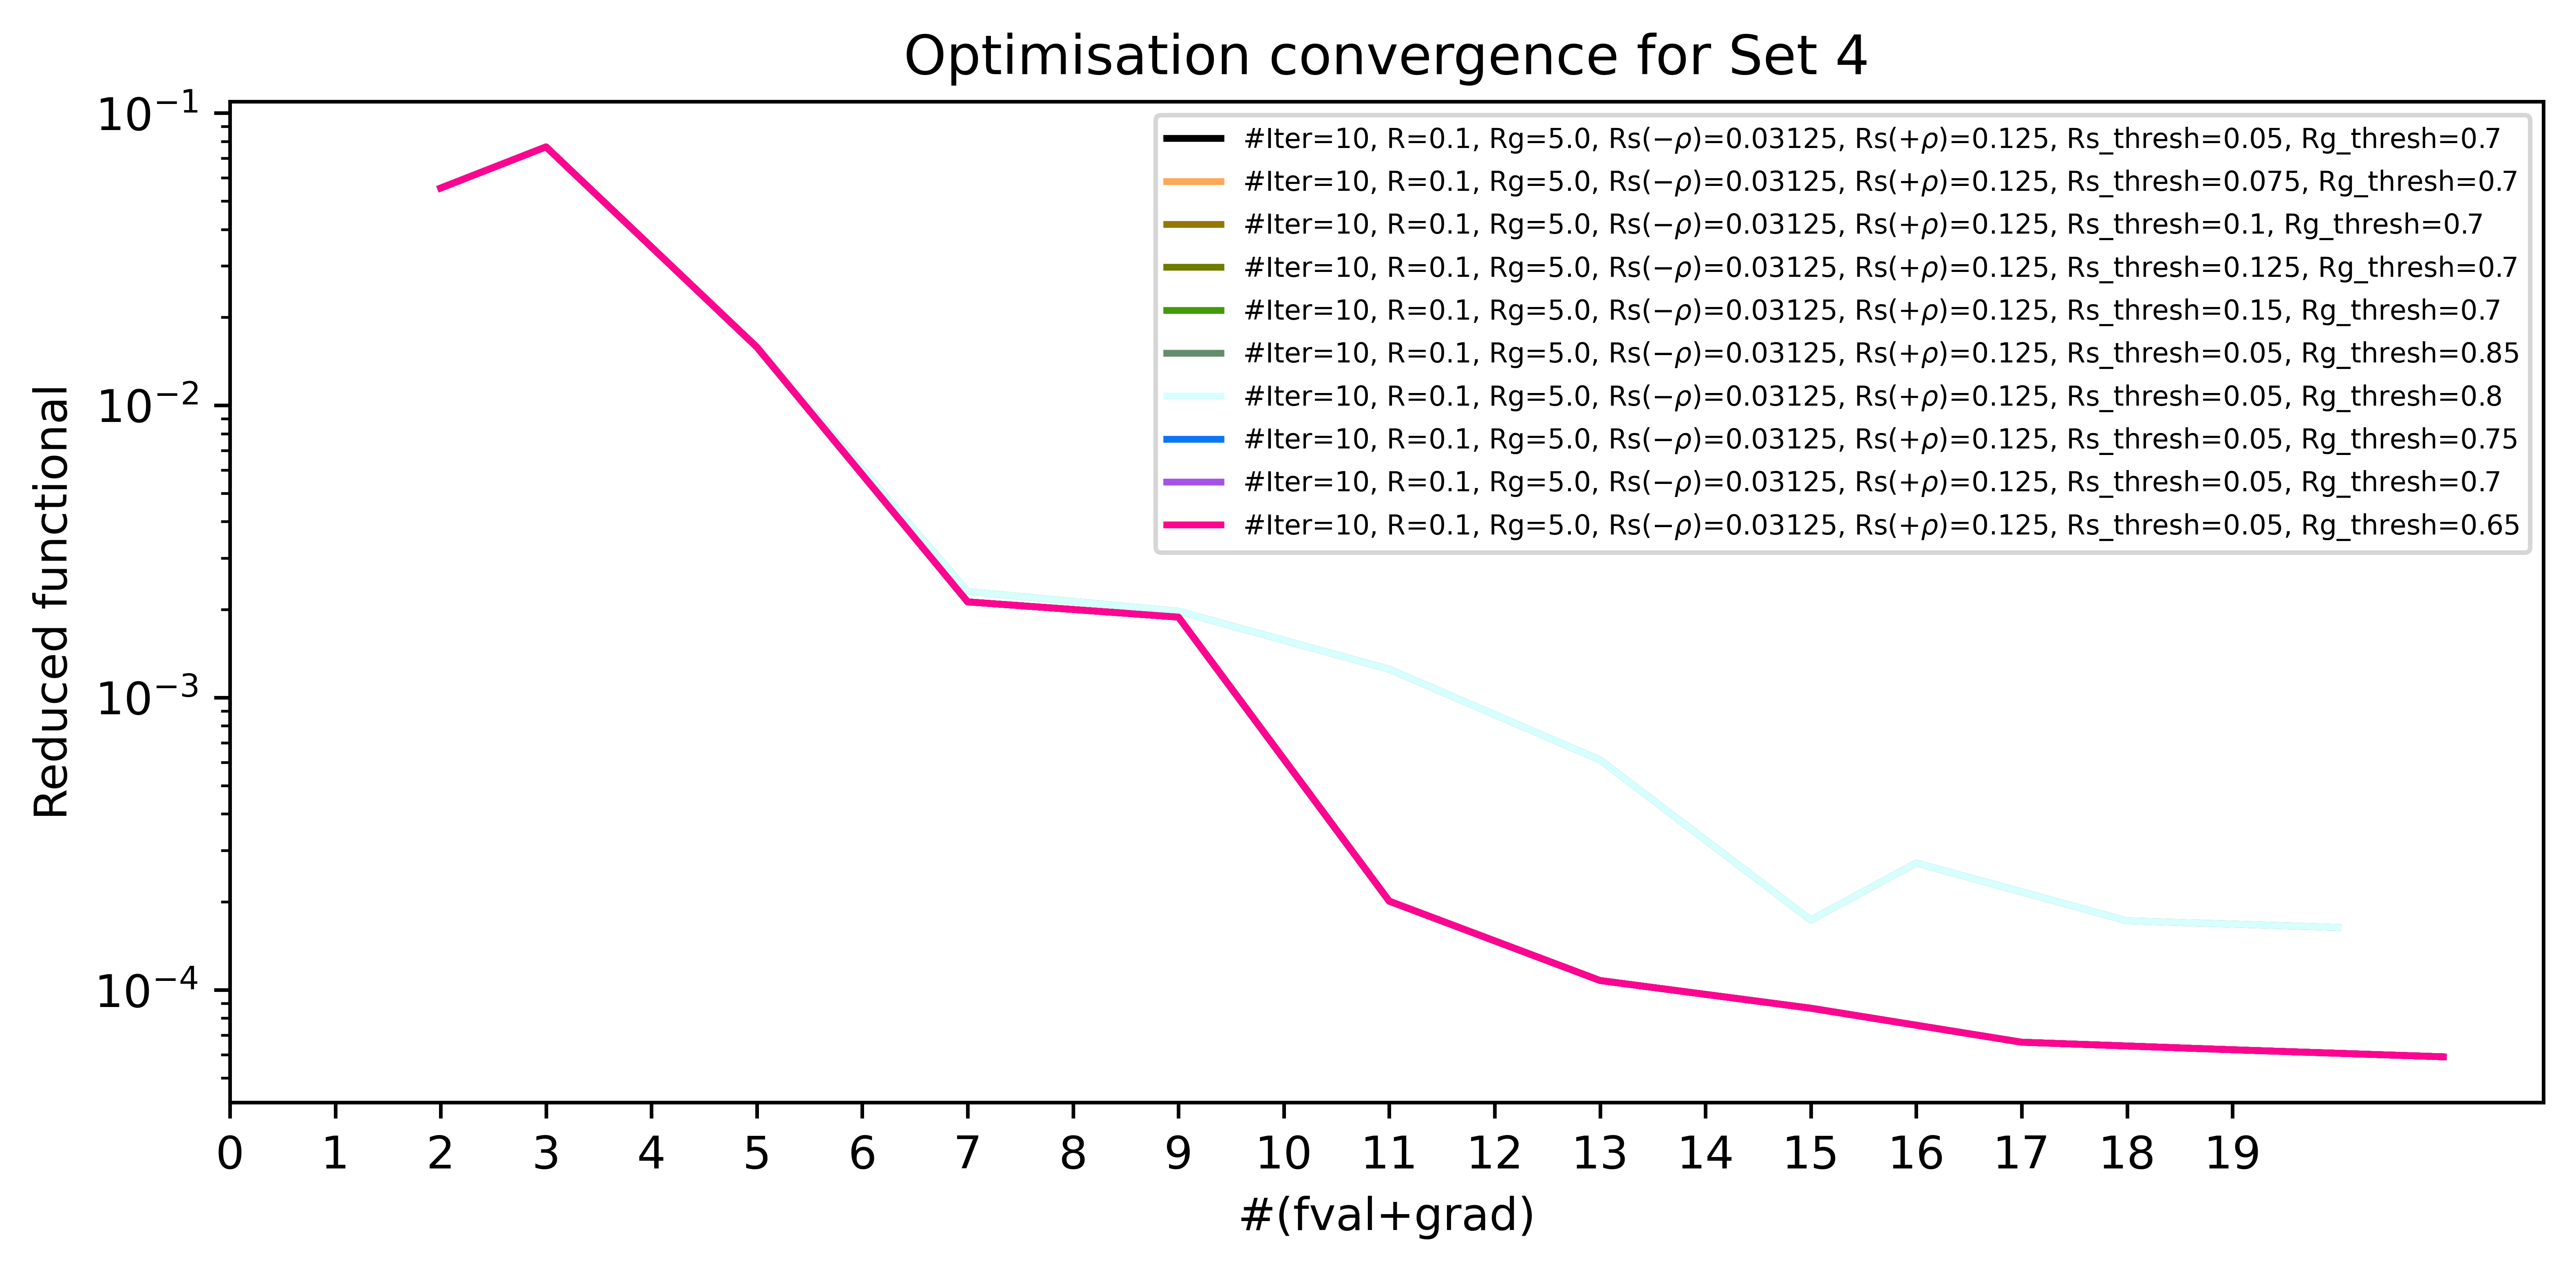

In [122]:
# Change these inputs
parameter_set_name = 'Set 4'
functional_set = './functionals/functional_Set_4_'

list=[] # Create an empty list for storing the functional values
list_no = len(iteration_limits) # Total parameter sets
index = 0 # Index for storing fval+grad sequence
x_values = [] # empty list for storing the fval+grad for corresponding functional values
# Read functional values from files
for i in range(list_no):
    filename = functional_set+str(i+1)+'.txt'
    # Open the file in read mode
    with open(filename, 'r') as file: 
        # Read lines from the file 
        lines = file.readlines() 
    # Convert the lines to numbers 
    numbers = [float(line.strip()) for line in lines] 
    list.append(numbers)
    fval_plus_grad_values = fval_plus_grad[index:index + len(numbers)]
    index = index + len(numbers)
    x_values.append(fval_plus_grad_values)

# Plot the list of functional values
plt.figure(figsize=(8,4), dpi=800)
colors = mcolors.XKCD_COLORS
names = sorted(colors, key=lambda c: tuple(mcolors.rgb_to_hsv(mcolors.to_rgb(c))))
step = int(len(names)/list_no)
for i in range(list_no):
    # plt.plot(list[i], label='Parameter Set: '+ str(i+1), color=(random.random(), random.random(), random.random()))
    label = '#Iter=' + str (iteration_limits[i]) + ', ' + 'R=' + str (initial_radius[i]) + ', ' + 'Rg=' + str (radius_growing_rate[i]) + ', ' \
    + 'Rs$(-\\rho)$=' + str (radius_shrinking_rate_negative_rho[i]) + ', ' + 'Rs$(+\\rho)$=' + str (radius_shrinking_rate_positive_rho[i]) + ', ' \
    + 'Rs_thresh=' + str (radius_shrinking_threshold[i]) + ', ' + 'Rg_thresh=' + str (radius_growing_threshold[i])
    plt.plot(x_values[i], list[i], label=label, color = colors[names[i*step]])
    # plt.plot(x_values[i], list[i])
    
plt.xlabel("#(fval+grad)")
plt.ylabel("Reduced functional")
plt.yscale("log")
plt.xticks(range(0,20))
plt.legend(loc=1, prop={'size': 6})
plt.title('Optimisation convergence for ' + parameter_set_name)
plt.tight_layout()